## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset into a Dataframe

In [2]:
df = pd.read_csv('Reviews.csv')
print(df.shape)
# Retriving Top 5 Rows
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# Retrieving List of COlumns
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Data Preparation

In [4]:
## Adding Some more Columns('Helpful%') for Upvote metrics
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


## Assigning Some Labels to helpful% as per its value

In [6]:
# Finding Unique Values of a Helpful% column
df['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [7]:
# categorizing the Labels by some values
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: Helpful %, Length: 568454, dtype: category
Categories (6, object): [Empty < 0-20% < 20-40% < 40-60% < 60-80% < 80-100%]

In [8]:
# Adding Upvote column to the Dataframe
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [9]:
# Finding Top 5 rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [10]:
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful %  
Score %upvote                                                              
1     Empty                      8060    8060     8060    8060       8060  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                      4234    4234     4234    4234       4234  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                      5062    5062     5062    5062       5062  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

#### considering only Id Column, as I have to count Total Upvotes for different different categories

In [11]:
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [12]:
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


## Creating Pivot Table for better conclusion

In [13]:
df_s.pivot(index='%upvote',columns='Score')

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

## Creating Heatmap for better Visualisations

Text(0.5, 1, 'How helpful users find among user scores\n')

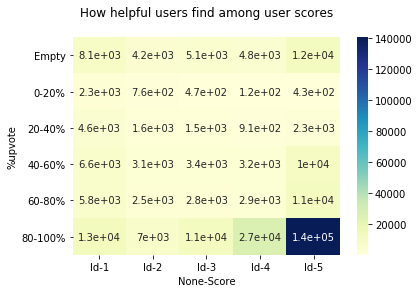

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores\n')

## Key message from above:

   #### Reviews are skewed towards positive
   #### More than half of the reviews are with zero votes
   #### Many people agree with score 5 reviews

In [15]:
df.shape

(568454, 12)

In [16]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


## Score prediction

In [17]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [18]:
df2 = df[df['Score'] != 3]
X = df2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)
y

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 525814, dtype: int64

## Converting your text into vectors using NLP

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

In [20]:
##taking a bit more time to execute
X_c = c.fit_transform(X)

In [21]:
print('features: {}'.format(X_c.shape[1]))

features: 114969


## Splitting Data for Training and Testing

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 394360


## Applying Logistic Regression Algorithm

In [23]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [24]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9360080332283537


## Fetching Top 20 Positive & Top 20 negative words

In [25]:
w = c.get_feature_names()
#W

In [26]:
coef = ml.coef_.tolist()[0]
#coef

In [27]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
#coeff_df

In [28]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
#coeff_df

In [29]:
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))

-Top 20 positive-
       Word  Coefficient
 pleasantly     3.872178
  addicting     3.148768
   downside     3.068882
  skeptical     2.812713
     hooked     2.550191
    worries     2.503637
     resist     2.468507
     delish     2.428173
   hesitant     2.277148
   drawback     2.219839
       whim     2.209663
  delighted     2.177449
      saves     2.160745
   soothing     2.109375
    perfect     2.071323
  excellent     2.066866
   stumbled     2.062420
   tastiest     2.030768
    trainer     2.016707
   relaxing     2.014619


-Top 20 negative-
           Word  Coefficient
            ick    -2.260567
       terrible    -2.288020
     unbearable    -2.377470
        allegro    -2.481693
          lousy    -2.485306
 disappointment    -2.520522
         lacked    -2.575266
    disapointed    -2.575694
        vomited    -2.614991
       mediocre    -2.634270
     overpowers    -2.701081
    embarrassed    -2.766111
         ripoff    -2.846443
     returnable    -2.880656
  

# Lets try to Acheive Best accuracy

## Creating a function for Applying Different Models

In [30]:
### create a function
def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

## Applying Countvectorizer with Logistic Regression

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
text_fit(X, y, c, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9358178526328602


-Top 20 positive-
       Word  Coefficient
 pleasantly     3.720922
   downside     3.236296
  addicting     3.122370
  skeptical     3.008596
     hooked     2.634206
    worries     2.446766
  delighted     2.340195
   drawback     2.320223
     solved     2.179431
       whim     2.172465
     delish     2.167670
     resist     2.137668
   terrific     2.097501
   hesitant     2.091560
   hesitate     2.081782
       calm     2.078321
   soothing     2.076642
  excellent     2.004401
    easiest     2.003054
      saves     1.986090


-Top 20 negative-
          Word  Coefficient
        bummer    -2.302559
         blech    -2.318968
    unbearable    -2.326698
    overpowers    -2.425971
   unappealing    -2.439060
       vomited    -2.452628
   disapointed    -2.481071
          lame    -2.500961
       defeats    -2.556616
        lacked    -2.623064
        ripoff    -2.688615
 d

## Lets define a predict function

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
predict(X,y,c,lr)

features: 114969
 train records: 394360
 test records: 131454
[[ 14687   2734]
 [  5677 108356]]
0.9360156404521733


## Accuracy is around 93.9% - not bad. 
### However we notice that some of those significant coefficients are not meaningful.
### Ex: 280mg.

In [34]:
from sklearn.dummy import DummyClassifier
text_fit(X, y, c, DummyClassifier(),0)

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.8435194060279642


## Applying TF-IDF with Logistic Regression

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9352168819511008


-Top 20 positive-
       Word  Coefficient
      great    14.327607
  delicious    11.899460
       best    11.758201
    perfect    10.535590
  excellent     9.758791
      loves     9.397912
     highly     8.558689
       love     8.406025
  wonderful     8.129124
    amazing     7.708416
    awesome     7.581722
       good     7.467868
     hooked     7.157274
 pleasantly     7.153384
   favorite     7.088999
       nice     6.966033
    pleased     6.656339
       glad     6.627383
      yummy     6.523929
     smooth     6.373532


-Top 20 negative-
           Word  Coefficient
          sorry    -5.594947
          waste    -5.742733
           yuck    -5.877079
    undrinkable    -5.945612
          worse    -6.056430
     disgusting    -6.135282
          stale    -6.199411
      tasteless    -6.284366
          bland    -6.363694
          threw    -6.451238
           weak    

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
[[ 14115   2205]
 [  6451 108683]]
0.9341518706163373


## Accurany is roughly the same - 93.5%. 
### However we notice that the significant words make much more sense now, with higher coefficient magnitude as well!

## Upvote prediction

    ** We will be focusing on score 5 reviews, and get rid of comments with neutral votes **

In [37]:
data = df[df['Score'] == 5]
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [38]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [39]:
X = data2['Text']

y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [40]:
print(y.value_counts())

1.0    151721
0.0      2707
Name: %upvote, dtype: int64


## The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.
### Let's resample the data to get balanced data:

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X_c=tf.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)
y_test.value_counts()

1.0    45525
0.0      804
Name: %upvote, dtype: int64

In [42]:
## RandomOverSampler to handle imbalanced data
import imblearn
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_c, y)
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [43]:
from collections import Counter

In [44]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [45]:
from sklearn.linear_model import LogisticRegression
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [46]:
import numpy as np
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [47]:
y_pred=clf.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9869196399663278
